In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


In [30]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Samsung_Dataset.csv')
data.tail(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Open,High,Low,Close,Adj Close,Volume
6122,2024-06-07,78400.0,78600.0,77100.0,77300.0,77300.0,21189349
6123,2024-06-10,76100.0,76600.0,75600.0,75700.0,75700.0,14598755
6124,2024-06-11,75900.0,76000.0,75100.0,75200.0,75200.0,16971175
6125,2024-06-12,75300.0,77100.0,75200.0,76500.0,76500.0,19246725
6126,2024-06-13,78400.0,79000.0,77800.0,78600.0,78600.0,33763804


In [10]:
data.shape

(6127, 7)

In [11]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
data['Volume']= data['Volume'].replace(0, np.nan)
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,127


In [13]:
data.dropna(inplace=True)

In [14]:
data.shape

(6000, 7)

In [15]:
data.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,float64


In [16]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,float64


In [17]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,6000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03
mean,2012-03-18 13:35:02.400000,28648.348333,28928.233333,28356.508333,28638.083333,24750.715569,2.162400e+07
min,2000-01-04 00:00:00,2540.000000,2760.000000,2420.000000,2730.000000,1988.168701,2.765000e+04
25%,2006-02-21 18:00:00,10960.000000,11100.000000,10820.000000,10955.000000,8054.940063,1.197128e+07
50%,2012-03-05 12:00:00,22010.000000,22410.000000,21810.000000,22110.000000,17399.051758,1.740456e+07
75%,2018-04-11 06:00:00,45780.000000,46212.500000,45350.000000,45750.000000,39145.315430,2.648136e+07
max,2024-06-13 00:00:00,90300.000000,96800.000000,89500.000000,91000.000000,85300.000000,1.642150e+08
std,NaN,22550.673121,22726.605243,22355.054153,22528.246548,22026.070914,1.489553e+07


In [18]:
data.head(
)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.709961,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859863,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.098145,46880000.0


In [19]:
def boxplot_data(feature_names, dataset):
    i=1
    plt.figure(figsize=(11,9))
    for col in feature_names:
        plt.subplot(4,4,i)
        plt.axis('on')
        plt.tick_params(axis='both', left = False, top = False, right = False,
                        bottom =True, labeltop=False, labelright=False, labelbottom= False, labelleft=False,)
        dataset[col].plot(kind='box',subplots=True,sharex=False)
        plt.title(col)
        i+=1
    plt.show()

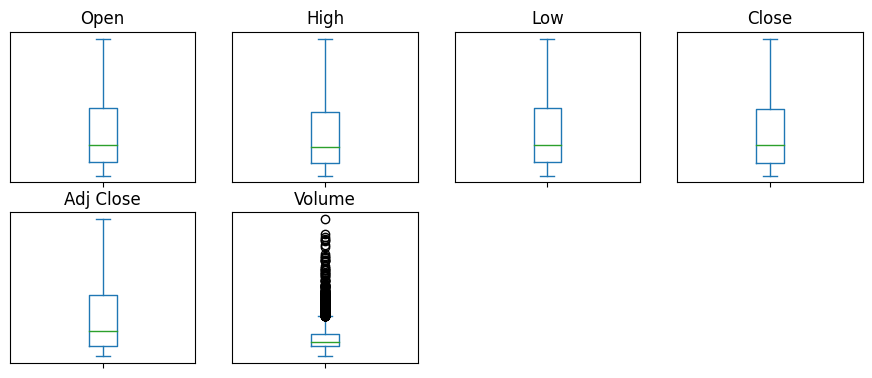

In [20]:
boxplot_data(data.columns[1:], data)

In [21]:
pip install prophet


In [22]:
#
data_pivot = data.pivot_table(index='Date', values=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], aggfunc='mean')
data_pivot.reset_index(inplace=True)
data_pivot.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2000-01-04,4449.709961,6110.0,6110.0,5660.0,6000.0,74195000.0
1,2000-01-05,4063.728760,5580.0,6060.0,5520.0,5800.0,74680000.0
2,2000-01-06,4092.859863,5620.0,5780.0,5580.0,5750.0,54390000.0
3,2000-01-07,4034.598877,5540.0,5670.0,5360.0,5560.0,40305000.0
4,2000-01-10,4202.098145,5770.0,5770.0,5580.0,5600.0,46880000.0


In [23]:
data_prophet_Volume = data_pivot[['Date', 'Volume']]
data_prophet_Volume= data_prophet_Volume.rename(columns={'Date':'ds', 'Volume':'y'})
data_prophet_Volume.head()

,ds,y
0,2000-01-04,74195000.0
1,2000-01-05,74680000.0
2,2000-01-06,54390000.0
3,2000-01-07,40305000.0
4,2000-01-10,46880000.0


In [35]:
data_prophet_Volume.tail()

,ds,y
5995,2024-06-07,21189349.0
5996,2024-06-10,14598755.0
5997,2024-06-11,16971175.0
5998,2024-06-12,19246725.0
5999,2024-06-13,33763804.0


In [69]:
data_prophet_Close = data_pivot[['Date', 'Close']]
data_prophet_Close= data_prophet_Close.rename(columns={'Date':'ds', 'Close':'y'})
data_prophet_Close.head()

,ds,y
0,2000-01-04,6110.0
1,2000-01-05,5580.0
2,2000-01-06,5620.0
3,2000-01-07,5540.0
4,2000-01-10,5770.0


In [25]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
open=data['Open'],
high=data['High'],
low=data['Low'],
close=data['Close'])])
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [52]:
from prophet import Prophet
Pr_Vol = Prophet(
  growth='linear',
  changepoints=None,
  n_changepoints=25,
  changepoint_range=0.8,
  yearly_seasonality='auto',
  weekly_seasonality='auto',
  daily_seasonality='auto',
  holidays=None,
  seasonality_mode='additive',
  seasonality_prior_scale=10.0,
  holidays_prior_scale=10.0,
  changepoint_prior_scale=0.05,
  mcmc_samples=0,
  interval_width=0.8,
  uncertainty_samples=1000,
  stan_backend=None
)

In [53]:
Pr_Vol.fit(data_prophet_Volume)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpamibrbwp/zeubylhv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpamibrbwp/hi_9ws_a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12293', 'data', 'file=/tmp/tmpamibrbwp/zeubylhv.json', 'init=/tmp/tmpamibrbwp/hi_9ws_a.json', 'output', 'file=/tmp/tmpamibrbwp/prophet_model2puhxc2a/prophet_model-20240815130730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:07:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [96]:
df_future = Pr_Vol.make_future_dataframe(periods=1000)
df_future.tail(5)

,ds
6995,2027-03-06
6996,2027-03-07
6997,2027-03-08
6998,2027-03-09
6999,2027-03-10


In [97]:
forecast = Pr_Vol.predict(df_future)
forecast.tail(5).transpose()

,6995,6996,6997,6998,6999
ds,2027-03-06 00:00:00,2027-03-07 00:00:00,2027-03-08 00:00:00,2027-03-09 00:00:00,2027-03-10 00:00:00
trend,20634929.042976,20635785.88124,20636642.719504,20637499.557768,20638356.396032
yhat_lower,13734071.666452,14546743.060134,1162580.585866,1068274.612846,3052483.849346
yhat_upper,42186760.498648,41067468.577784,29119571.159015,29552574.537145,30836345.902467
trend_lower,17220727.047093,17216908.608351,17213090.16961,17209271.730868,17205453.292126
trend_upper,24065089.996646,24071814.734727,24078539.472808,24085264.210888,24091988.948969
additive_terms,7372093.870945,7485886.22449,-5670445.575976,-4958128.001823,-3616050.199522
additive_terms_lower,7372093.870945,7485886.22449,-5670445.575976,-4958128.001823,-3616050.199522
additive_terms_upper,7372093.870945,7485886.22449,-5670445.575976,-4958128.001823,-3616050.199522
weekly,8242799.57427,8242805.042386,-5033731.868107,-4447198.497347,-3235397.868408


In [98]:
y_pred = forecast['yhat'][-2000:-1000]
y_true = data_prophet_Volume['y'][-1000:]

In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 66969013774202.49
Root Mean Squared Error: 8183459.767983373
Mean Absolute Error: 5574889.137898751


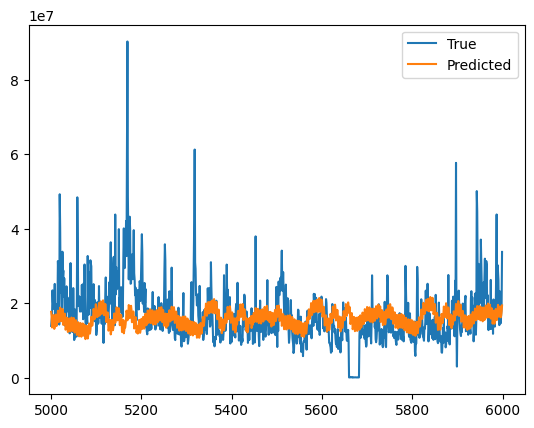

In [100]:
plt.plot(y_true, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [101]:
Pr_Cls = Prophet()

In [102]:
Pr_Cls.fit(data_prophet_Close)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpamibrbwp/6p00btss.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpamibrbwp/a6cjirtz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28329', 'data', 'file=/tmp/tmpamibrbwp/6p00btss.json', 'init=/tmp/tmpamibrbwp/a6cjirtz.json', 'output', 'file=/tmp/tmpamibrbwp/prophet_modelxs8ibef4/prophet_model-20240815133443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:34:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [103]:
df_future = Pr_Vol.make_future_dataframe(periods=30)
df_future.tail(5)

,ds
6025,2024-07-09
6026,2024-07-10
6027,2024-07-11
6028,2024-07-12
6029,2024-07-13


In [104]:
forecast_cls = Pr_Cls.predict(df_future)
forecast_cls.tail(5).transpose()

,6025,6026,6027,6028,6029
ds,2024-07-09 00:00:00,2024-07-10 00:00:00,2024-07-11 00:00:00,2024-07-12 00:00:00,2024-07-13 00:00:00
trend,77505.785062,77518.99243,77532.199798,77545.407166,77558.614534
yhat_lower,70749.118548,70726.823389,70811.619306,70548.986357,71382.759805
yhat_upper,83381.740675,82746.471966,83095.045813,83001.316205,84216.823685
trend_lower,77505.785062,77518.99243,77532.199798,77545.407166,77558.614534
trend_upper,77505.785062,77518.99243,77532.199798,77545.407166,77558.614534
additive_terms,-568.758128,-594.486368,-504.758452,-517.415984,375.266188
additive_terms_lower,-568.758128,-594.486368,-504.758452,-517.415984,375.266188
additive_terms_upper,-568.758128,-594.486368,-504.758452,-517.415984,375.266188
weekly,-195.673019,-258.067959,-207.689209,-261.488262,589.193712


In [105]:
y_pred_cls = forecast_cls['yhat'][-60:-30]
y_true_cls = data_prophet_Close['y'][-30:]

In [106]:
mse = mean_squared_error(y_true_cls, y_pred_cls)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true_cls, y_pred_cls)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 3787943.9934531883
Root Mean Squared Error: 1946.2641119470884
Mean Absolute Error: 1564.1869456065508


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



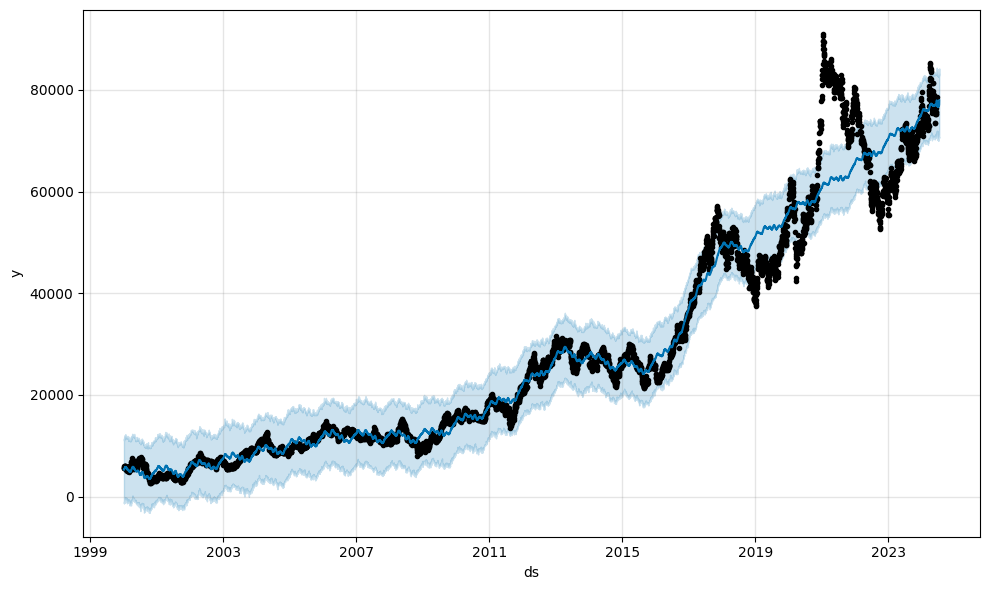

In [109]:
fig=Pr_Cls.plot(forecast_cls)
fig.show()